In [28]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

We have $$\bar{X}(N) = \frac{1}{N} \sum_{i=1}^N X_i, \quad X_i \sim \mathrm{Uniform}(0, 1)$$
and $$\hat{X}(N) = \text{median}(X_1, \dots, X_N), \quad X_i \sim \mathrm{Uniform}(0, 1)\;.$$

We analytically derived that both estimates should converge to $0.5$. However, because we observed two different variance convergence rates, we now wish to empirically verify the dervied convergence rate. 

In [29]:
# seed the generator
SEED = 42
np.random.seed(SEED)

NUM_RUNS = 20
NUM_SAMPLES = 1000

In [30]:
def X_bar(_X):
    return np.mean(_X)

def X_hat(_X):
    return np.median(_X)

### $\bar{X}(N)$

In [31]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_bar(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(20, 1000)

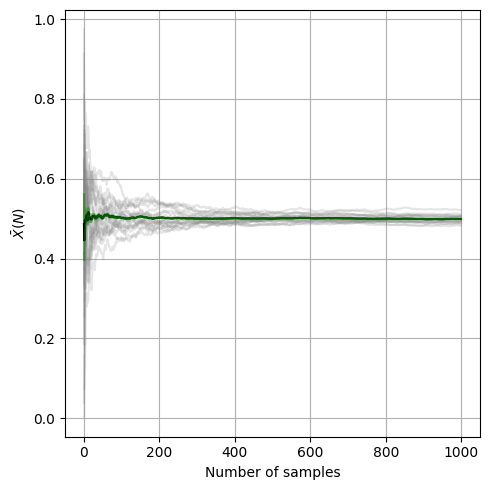

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_61070/2464779465.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


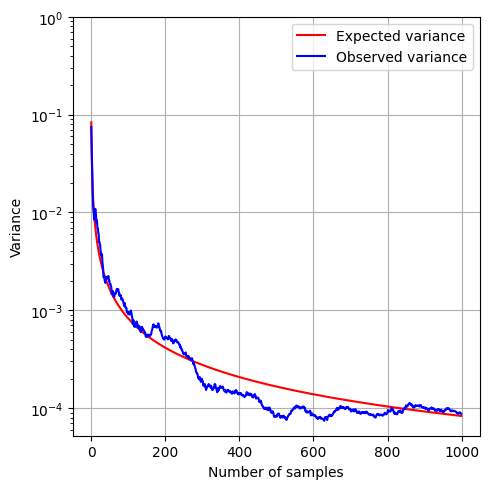

In [33]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 12.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [34]:
means_bar = means.copy()
expected_variance_bar = X.copy()
variance_bar = variances.copy()

### $\hat{X}(N)$

In [35]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_hat(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(20, 1000)

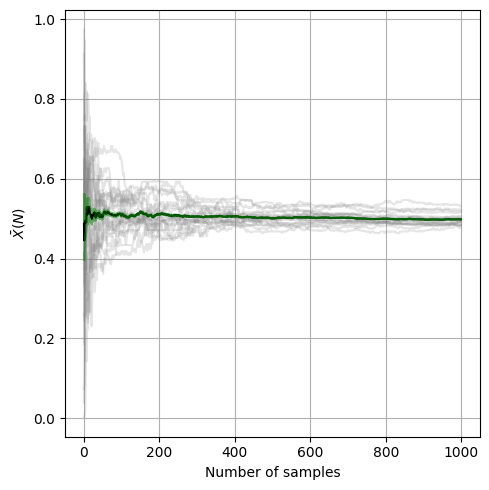

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_61070/2958123404.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


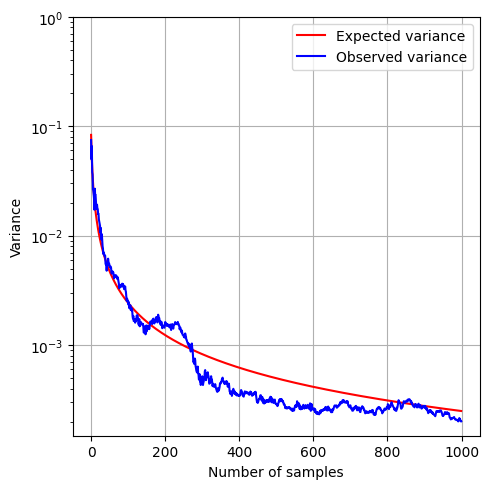

In [37]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 4
X += 8.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [38]:
means_hat = means.copy()
expected_variance_hat = X.copy()
variance_hat = variances.copy()

### Compare

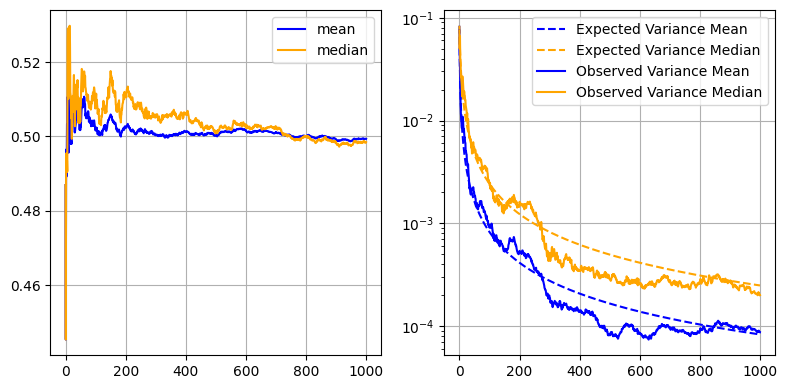

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))


ax[0].plot(means_bar, label="mean", c='blue',)
ax[0].plot(means_hat, label="median", c='orange')

ax[0].legend()
ax[0].grid(True)

ax[1].plot(expected_variance_bar, label="Expected Variance Mean", c='blue', linestyle='--')
ax[1].plot(expected_variance_hat, label="Expected Variance Median", c='orange', linestyle='--')
ax[1].plot(variance_bar, label="Observed Variance Mean", c='blue')
ax[1].plot(variance_hat, label="Observed Variance Median", c='orange')


ax[1].legend()
ax[1].grid(True)

# log y axis
ax[1].set_yscale('log')
fig.tight_layout()


**Remark**

We clearly observe that the observed variances match the equations that we derived analytically. Furthermore, We clearly observe, that the mean estimation has a better estimation of the expectation of $X$, as not only are the means higher in the median estimator, but the variance of the mean estimator is also lower than the median estimator

## Test

In [40]:
P = np.array([
    [0.0,   0.095, 0.905],
    [0.255, 0.0,   0.745],
    [0.745, 0.255, 0.0]
])
pi = np.array([1.0, 1.0, 1.0]) / 3.0

In [41]:
steps = 10
for step in range(steps):
    pi = pi @ P

print(pi)

[0.40299702 0.15930709 0.43769589]


# Problem 2
## (c)

In [42]:
## Monte Carlo
class Environment:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

    def step(self) -> int:
        if self.state == 0:
            if np.random.rand() <= 0.095:
                self.capital += 1
            else:
                self.capital -= 1
        else:
            if np.random.rand() <= 0.745:
                self.capital += 1
            else:
                self.capital -= 1

        self.compute_state()

        return self.capital

In [77]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = Environment(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(600, 1000)

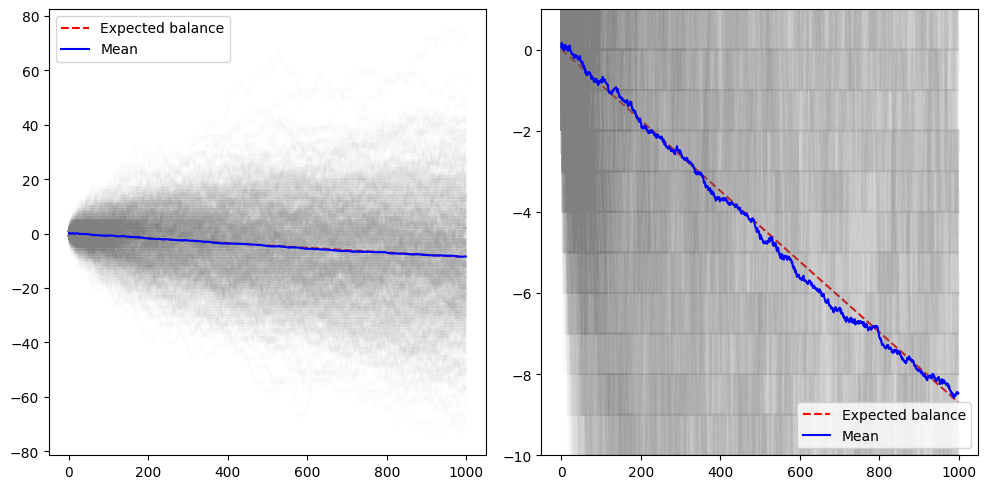

In [ ]:
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * (-0.0086952867)

min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='gray', alpha=0.02)
    ax[1].plot(all_deltas[run], c='gray', alpha=0.02)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(-10, 1)

ax[0].legend()
ax[1].legend()

fig.tight_layout()
